# Mental Health in 2002

#### This project explores the relationship between age and a select few mental health disorders. I have parsed the data from a Canadian Community Mental Health Survey CSV to plot a line chart of the average amount of people suffering from a specific mental health disorder in each of the chosen age group ranges.

##### The Available Information

The available information includes:
* ref_date (reference date) in the form of the year that the mental health and well-being profile was conducted
    * in this case, the data is all from 2002
* geography for the people who were interviewed
    * all entries occur in Canada
* age of the people who were interviewed
    * in one of the following age groups: total, 15 years and over; 15 to 24 years; 25 to 64 years; 65 years and over
* sex of the participants
    * in one of the following categories: both sexes, males, or females
* mental health and well-being profile: 
   
     * in one of the following mental health disorder categories: major depressive episode, manic episode (mania), panic disorder, social phobia (social anxiety disorder), agoraphobia, any measured disorder or substance dependence, suicidal thoughts, persons who do not consider themselves a gambler, people at risk of an eating disorder, alcohol dependence, ilicit drug dependence, people who are satisfied with life,  self-rated mental health, self-rated work stress, contact with services and support for problems, health care needs associated with mental health, barriers accessing mental health services due to accessibility issues, barriers accessing mental health services not encountered due to acceptability issues
    
    * and one of the following subcategories: total population, all measured criteria are met, measured criteria not met, not stated
    
* units, in one of the following types (number of persons, low 95% confidence interval (number of persons), high 95% confidence (number of persons), coefficient of variation for number of persons, percent, low 95% confidence interval (percent)) 
* value/count of the survey results, represented as a number, based on the unit type
    * information is missing if float (because values can be represented as percentages or confidence intervals) is replaced with "f"

#### Designing and Building The Plot 

Of the available data, I have chosen to represent 3 disorders. I will take the average of the amount (both sexes) for each age group of each disorder (the total for those who have indicated a mental health issue / total survey entries). 

In [ ]:
from typing import NamedTuple, List
import csv

##################
# Data Definitions

from enum import Enum

DisorderType = Enum('DisorderType', ['SUICIDAL_THOUGHTS', 'SOCIAL_PHOBIA',
                                     'EATING_DISORDER'])
# interp. the type of mental health disorder someone can have can be 
# suicidal thoughts (SUICIDAL_THOUGHTS), social anxiety disorder 
# (SOCIAL_PHOBIA), or risk of an eating disorder (EATING_DISORDER)

# examples are redundant for enumerations 

# template based on Enumeration (3 cases)
@typecheck
def fn_for_disorder_type(dt: DisorderType) -> ...:
    if dt == DisorderType.SUICIDAL_THOUGHTS:
        return ...
    elif dt == DisorderType.SOCIAL_PHOBIA:
        return ...
    elif dt == DisorderType.EATING_DISORDER:
        return ...

    
from enum import Enum

AgeGroup = Enum('AgeGroup', ['fifteen_to_twentyfour', 'twentyfive_to_sixtyfour', 'sixtyfive_and_up'])
# interp. the age group for people who took the mental health survey
# can be 15-24 years old, 25-64 years old, or 65 and older

# examples are redundant for enumerations 

# template based on Enumeration (3 cases)
@typecheck
def fn_for_age_group(ag: AgeGroup) -> ...:
    if ag == AgeGroup.fifteen_to_twentyfour:
        return ...
    elif ag == AgeGroup.twentyfive_to_sixtyfour:
        return ...
    elif ag == AgeGroup.sixtyfive_and_up:
        return ...
    
    
MentalHealthData = NamedTuple('MentalHealthData', [('type', DisorderType),
                                                   ('age_group', AgeGroup),
                                                   ('count', int)]) # in range [0, ...)

# interp. a mental health data with its type (a person can be having
# suicidal thoughts, social anxiety disorder, an eating disorder), 
# the age group of people who took the survey, and the count for the
# number of people who have that mental health disorder

MHD0 = MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.fifteen_to_twentyfour, 4136460)
MHD1 = MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.twentyfive_to_sixtyfour, 17133721)
MHD2 = MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.sixtyfive_and_up, 33758)

# template based on Compound and Reference Rule
@typecheck
def fn_for_mental_health_data(mhd: MentalHealthData) -> ...: 
    return ...(fn_for_disorder_type(mhd.type),
               fn_for_age_group(mhd.age_group),
               mhd.count)

# List[MentalHealthData]
# interp. a list of Mental Health Data, consisting of the type of 
# mental health disorder, age group of the people being surveyed,
# and total count for number of people who have that disorder

LOMHD0 = []
LOMHD1 = [MHD1]
LOMHD2 = [MHD1, MHD2]

# template based on arbitrary-sized data and Reference Rule
@typecheck
def fn_for_lomhd(lomhd: List[MentalHealthData]) -> ...:
    # description of the accumulator
    acc = ...   # type: ...

    for mhd in lomhd:
        acc = ...(fn_for_mental_health_data(mhd), acc)

    return ...(acc)

#### Below are a function to read the information and store it as data in my program and functions to analyze the data

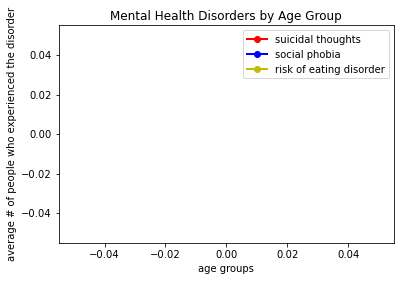

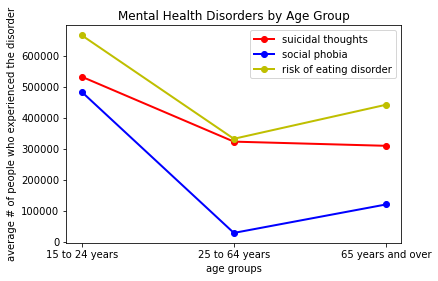

2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
4 of 4 tests passed
4 of 4 tests passed
3 of 3 tests passed
3 of 3 tests passed


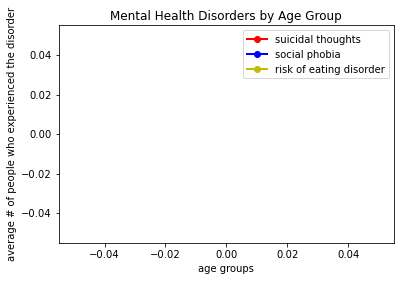

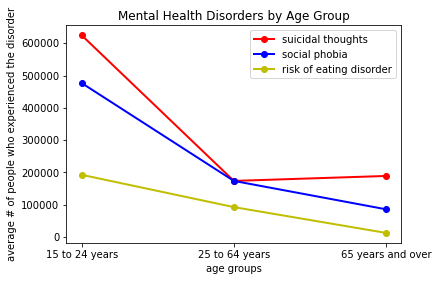

2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
2 of 2 tests passed
3 of 3 tests passed


In [91]:
###########
# Functions
from matplotlib import pyplot


# Main Function
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, calculates the average number of people
    who reported to have one of the following mental health disorders: suicidal
    thoughts, social phobia, or risk of eating disorder, for each of the following
    age groups: "15 to 24 years", "25 to 64 years", or "65 years and over", and
    plots 3 distinct lines using the data in a line chart
    """
    # return None     #stub
    # Template from HtDAP, based on function composition 
    return mental_disorders_and_age_groups(read(filename))
    
    

# Read Function   
@typecheck
def read(filename: str) -> List[MentalHealthData]:
    """    
    reads information from the specified file and returns a list of mental
    health data. returns only rows that have the desired disorder type for this
    project ("Suicidal thoughts in past 12 months", "Social phobia (social 
    anxiety disorder), all measured criteria are met", or "At risk of eating 
    disorder"), and desired age group ("15 to 24 years", "25 to 64 years",
    or "65 years and over"), and desired unit type ("Number of persons")
    
    excludes those where the data may be unusable because the survey results 
    were incomplete, represented by a value of "F"
    """
    #return []  #stub
    # Template from HtDAP
    
    # lomhd contains the result so far
    lomhd = [] # type: List[MentalHealthData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
           
            if is_usable(row):
                if is_desired_disorder_type(row):
                    if is_desired_age_group(row):
                        mhd = MentalHealthData(parse_disorder_type(row[4]), parse_age_group(row[2]), parse_int(row[6]))
                        lomhd.append(mhd)
                    

    return lomhd

@typecheck
def is_usable(columns: List[str]) -> bool:
    """
    return True if the count/value (columns[6]) is a number (not "F")
    and if the unit (columns[5]) == "Number of persons", since that's
    the only unit of data this project should access
    
    assumes columns is a full row of column values from the mental health
    information data file, specifically, columns[6] must exist, 
    be the count/value type field, and be a string representation of an int.
    similarly, columns[5] must exist, be the unit type field, and be a string
    
    counts "F" are not usable, since they may indicate missing survey data
    """
    # return True  #stub
    # template treats columns as atomic and uses indexing instead
    # return ...(columns)  #template
    return columns[6] != "F" and columns[5] == "Number of persons"

@typecheck
def is_desired_disorder_type(columns: List[str]) -> bool:
    """
    returns True if the disorder type of mhd is one of the three that will
    be used in this project (if they are "Suicidal thoughts in past 12 months",
    "Social phobia (social anxiety disorder), all measured criteria are met",
    or "At risk of eating disorder"), otherwise returns False
    """
    # return True     #stub
    # template treats columns as atomic and uses indexing instead
    # return ...(columns)  #template
    if columns[4] == "Suicidal thoughts in past 12 months":
        return True
    if columns[4] == "Social phobia (social anxiety disorder), all measured criteria are met":
        return True
    if columns[4] == "At risk of eating disorder":
        return True
    else:
        return False
    
@typecheck
def is_desired_age_group(columns: List[str]) -> bool:
    """
    returns True if the age group of mhd is one of the three that will
    be used in this project (if they are "15 to 24 years", "25 to 64 years",
    or "65 years and over"), otherwise returns False
    """
    # return True     #stub
    # template treats columns as atomic and uses indexing instead
    # return ...(columns)  #template
    if columns[2] == "15 to 24 years":
        return True
    if columns[2] == "25 to 64 years":
        return True
    if columns[2] == "65 years and over":
        return True
    else:
        return False

@typecheck
def parse_disorder_type(s: str) -> DisorderType:
    """
    given a string which must be one of "Suicidal thoughts in past 12 months",
    "Social phobia (social anxiety disorder), all measured criteria are met",
    or "At risk of eating disorder", returns the corresponding DisorderType
    """
    # return DisorderType.EATING_DISORDER  #stub
    # return ...(s)  #template
    
    if s == "Suicidal thoughts in past 12 months":
        return DisorderType.SUICIDAL_THOUGHTS
    elif s == "Social phobia (social anxiety disorder), all measured criteria are met":
        return DisorderType.SOCIAL_PHOBIA
    elif s == "At risk of eating disorder":
        return DisorderType.EATING_DISORDER

    
@typecheck
def parse_age_group(s: str) -> AgeGroup:
    """
    given a string which must be one of "15 to 24 years", "25 to 64 years",
    or "65 years and over", returns the corresponding AgeGroup
    """
    # return AgeGroup.sixtyfive_and_up  #stub
    # return ...(s)  #template
    
    if s == "15 to 24 years":
        return AgeGroup.fifteen_to_twentyfour
    elif s == "25 to 64 years":
        return AgeGroup.twentyfive_to_sixtyfour
    elif s == "65 years and over":
        return AgeGroup.sixtyfive_and_up

    
    
    
# Analyze Function
@typecheck
def mental_disorders_and_age_groups(lomhd: List[MentalHealthData]) -> None:
    """ 
    draws a line chart with separate lines representing the average count
    for the 3 mental health disorders (suicidal thoughts, social phobia, and
    risk of eating disorder) for each of the following age groups: "15 to 24 
    years", "25 to 64 years", or "65 years and over"
    
    """ 

    # return None     #stub
    # template based on visualization
    
    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('age groups')
    pyplot.ylabel('average # of people who experienced the disorder')
    pyplot.title("Mental Health Disorders by Age Group")
    
    
    # plot the data
    x_vals = ["15 to 24 years", "25 to 64 years", "65 years and over"]
    
    if lomhd != []:
        y_vals_suicidal_thoughts = get_y_values(lomhd, DisorderType.SUICIDAL_THOUGHTS)
        y_vals_social_phobia = get_y_values(lomhd, DisorderType.SOCIAL_PHOBIA)
        y_vals_eating_disorder = get_y_values(lomhd, DisorderType.EATING_DISORDER)
    else:
        x_vals = []
        y_vals_suicidal_thoughts = []
        y_vals_social_phobia = []
        y_vals_eating_disorder = []

    line1 = pyplot.plot(x_vals, y_vals_suicidal_thoughts)
    line2 = pyplot.plot(x_vals, y_vals_social_phobia)
    line3 = pyplot.plot(x_vals, y_vals_eating_disorder)
     
    # create the line chart, with markers distinct coloured
    # lines and little dots (marker='o')
    pyplot.setp(line1, color='r', linewidth=2.0, marker="o", label="suicidal thoughts")
    pyplot.setp(line2, color='b', linewidth=2.0, marker="o", label="social phobia")
    pyplot.setp(line3, color='y', linewidth=2.0, marker="o", label="risk of eating disorder")
    
    # show the plot
    pyplot.legend()
    pyplot.show()
    
    return None   


    
def get_y_values(lomhd: List[MentalHealthData], dt: DisorderType) -> List[float]:
    """
    given a DisorderType, returns a list containing the average number of 
    people who have the given DisorderType in each respective AgeGroup
    
    assumes that lomhd is not empty and that there is an average count for 
    each age group
    """
    # return []     #stub
    # template based on composition
    # desc of acc
    survey_results = []
    survey_results.append(calculate_average_count
                          (filter_by_age
                           (filter_by_type(lomhd, dt), AgeGroup.fifteen_to_twentyfour)))
    
    survey_results.append(calculate_average_count
                          (filter_by_age
                           (filter_by_type(lomhd, dt), AgeGroup.twentyfive_to_sixtyfour)))
    
    survey_results.append(calculate_average_count
                          (filter_by_age
                           (filter_by_type(lomhd, dt), AgeGroup.sixtyfive_and_up)))
    
    return survey_results


def calculate_average_count(lomhd: List[MentalHealthData]) -> float:
    """
    calculates the average number of people who had a certain mental
    health disorder based on the available survey results
    
    return 0 if there are no MentalHealthData on the list
    """
    # return 0.0     #stub

    # template based on composition
    # 1. count the number of movies in lom
    # 2. sums the ratings of movies in lom
    # 3. return sum/count
    if count_survey_results(lomhd) == 0:
        return 0
    else:
        return add_survey_results(lomhd)/count_survey_results(lomhd)


def add_survey_results(lomhd: List[MentalHealthData]) -> int:
    """
    sums the survey result values (number of people) in lomhd,
    assuming lomhd is not empty
    """
    # return 0     #stub
    
    # template based on List[MentalHealthData]
    # sum stores the total number of people who were
    # reported to have a certain mental health disorder
    sum = 0   # type: int

    for mhd in lomhd:
        sum = sum + mhd.count

    return sum


def count_survey_results(lomhd: List[MentalHealthData]) -> int:
    """
    sums the amount of surveys that were administered in lomhd,
    assuming lomhd is not empty
    """
    # return 0     #stub
    
    # template based on List[MentalHealthData]
    # count stores the sum of surveys that were administered so far
    count = 0   # type: int

    for mhd in lomhd:
        count = count + 1

    return count



def filter_by_age(lomhd: List[MentalHealthData], ages: AgeGroup) -> List[MentalHealthData]:
    """
    takes in and filters a list of MentalHealthData and returns a list of MentalHealthData
    whose age group matches a given AgeGroup, assuming the AgeGroups can only
    be one of: AgeGroup.fifteen_to_twentyfour, AgeGroup.twentyfive_to_sixtyfour,
    or AgeGroup.sixtyfive_and_up
    """
    # return []     #stub
    # template copied from List[MentalHealthData]
    # has_matching_age_group stores a list of MentalHealthData which have the same 
    # age group as the given AgeGroup
    has_matching_age_group = []   # type: List[MentalHealthData]
   
    for mhd in lomhd:
        if mhd.age_group == ages:
            has_matching_age_group.append(mhd)
    
    return has_matching_age_group



def filter_by_type(lomhd: List[MentalHealthData], dt: DisorderType) -> List[MentalHealthData]:
    """
    takes in and filters a list of MentalHealthData and returns those
    whose disorder type matches a given DisorderType, assuming the 
    DisorderTypes can only be one of: DisorderType.SUICIDAL_THOUGHTS,
    DisorderType.EATING_DISORDER, or DisorderType.SOCIAL_PHOBIA
    """
    # return []     #stub
    # template copied from List[MentalHealthData]
    # has_matching_disorder_type stores a list of the MentalHealthData which have the
    # same disorder type as the given DisorderType
    has_matching_disorder_type = []   # type: List[MentalHealthData]
    
    for mhd in lomhd:
        if mhd.type == dt:
            has_matching_disorder_type.append(mhd)
    
    return has_matching_disorder_type

    

# Examples and tests for main
start_testing()
# should produce an empty plot with: title "Mental Health Disorders by Age Group", x and y axis
# labels showing "age groups" and "average # of people who experienced the disorder" respectively,
# and a legend with the 3 types of mental disorders
expect(main("testfile_empty.csv"), None)
# should produce a line chart with the same labels, but with 3 different coloured
# lines each representing the average count for people who suffered from that
# mental health disorder, with data points for each age group
expect(main("testfile_main.csv"), None)
summary()


# Examples and tests for read
start_testing()
expect(read("testfile_empty.csv"), [])
# contains a case in which disorder type and age group is incorrect (doesn't pass by is_desired_disorder_type or is_desired_age_group)
expect(read("testfile_small1.csv"), [MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 80324),
                                     MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 193297)])
expect(read("testfile_small2.csv"), [MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.twentyfive_to_sixtyfour, 610519),
                                     MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027),
                                     MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 124148),
                                     MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.twentyfive_to_sixtyfour, 296326),
                                     MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 80324)])
summary()

# examples and tests for is_usable
expect(is_usable(["2002","Canada","65 years and over","Both sexes","Alcohol dependence, highly probable case","Percent","F"]), False)
expect(is_usable(["2002","Canada","Total, 15 years and over","Males","Panic disorder, not stated","High 95% confidence interval, percent","1.9"]), False)
expect(is_usable(["2002","Canada","65 years and over","Both sexes","Risk of eating disorder, not stated","Number of persons","6509"]), True)
summary()

# examples and tests for is_desired_disorder_type
start_testing()
expect(is_desired_disorder_type(["2002","Canada","65 years and over","Both sexes","Alcohol dependence, highly probable case","Percent","F"]), False)
expect(is_desired_disorder_type(["2002","Canada","65 years and over","Both sexes","At risk of eating disorder","Percent","F"]), True)
expect(is_desired_disorder_type(["2002","Canada","25 to 64 years","Both sexes","Suicidal thoughts in past 12 months","Percent","F"]), True)
expect(is_desired_disorder_type(["2002","Canada","15 to 24 years","Both sexes","Social phobia (social anxiety disorder), all measured criteria are met","Number of persons","6509"]), True)
summary()

# examples and tests for is_desired_age_group
start_testing()
expect(is_desired_age_group(["2002","Canada","Total","15 years and over","Males","Very good self-rated mental health","Number of persons","4787165"]), False)
expect(is_desired_age_group(["2002","Canada","65 years and over","Both sexes","At risk of eating disorder","Percent","F"]), True)
expect(is_desired_age_group(["2002","Canada","25 to 64 years","Both sexes","Alcohol dependence, highly probable case","Percent","F"]), True)
expect(is_desired_age_group(["2002","Canada","15 to 24 years","Both sexes","Risk of eating disorder, not stated","Number of persons","6509"]), True)
summary()

# examples and tests for parse_disorder_type
expect(parse_disorder_type("Suicidal thoughts in past 12 months"), DisorderType.SUICIDAL_THOUGHTS)
expect(parse_disorder_type("Social phobia (social anxiety disorder), all measured criteria are met"), DisorderType.SOCIAL_PHOBIA)
expect(parse_disorder_type("At risk of eating disorder"), DisorderType.EATING_DISORDER)
summary()

# examples and tests for parse_age_group
expect(parse_age_group("15 to 24 years"), AgeGroup.fifteen_to_twentyfour)
expect(parse_age_group("25 to 64 years"), AgeGroup.twentyfive_to_sixtyfour)
expect(parse_age_group("65 years and over"), AgeGroup.sixtyfive_and_up)
summary()

# Examples and tests mental_disorders_and_age_groups (analyze function)
start_testing()
# an empty chart with title "Mental Health Disorders by Age Group", x and y axis
# labels showing "age groups" and "average # of people who experienced the disorder" respectively,
# and a legend with the 3 types of mental disorders
expect(mental_disorders_and_age_groups([]), None)
# a line chart with the same labels but with a line representing average count for the 
# disorder social phobia (476890, 173915, 86029), a line representing average count values
# for suicidal thoughts (624917, 173915, 189229), and a line representing average count values
# for risk of eating disorder (192817, 92815, 12891). these data points are plotted to represent
# the three age groups 15-24 y/o, 25-64 y/o, and 65+ y/o respectively
expect(mental_disorders_and_age_groups([MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 476890),
                                        MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.twentyfive_to_sixtyfour, 173915),
                                        MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.sixtyfive_and_up, 86029),
                                        MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.fifteen_to_twentyfour, 624917),
                                        MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.twentyfive_to_sixtyfour, 173915),
                                        MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 189229),
                                        MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 192817),
                                        MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.twentyfive_to_sixtyfour, 92815),
                                        MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.sixtyfive_and_up, 12891)]), None)
summary()

# Examples and tests for get_y_values 
start_testing()
expect(get_y_values([MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.twentyfive_to_sixtyfour, 610519),
                      MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027),
                      MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 124148),
                      MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.twentyfive_to_sixtyfour, 296326),
                      MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.sixtyfive_and_up, 80324)], DisorderType.EATING_DISORDER), [124148, 296326, 80324])
expect(get_y_values([MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.fifteen_to_twentyfour, 624917),
                      MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.twentyfive_to_sixtyfour, 173915),
                      MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 148029)], DisorderType.SUICIDAL_THOUGHTS), [624917, 173915, 148029])
summary()


# Examples and tests for calculate_average_count 
start_testing()
expect(calculate_average_count(LOMHD1), 17133721)
expect(calculate_average_count(LOMHD2), (17133721+33758)/2)
expect(calculate_average_count([MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 273914),
                                MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 624917),
                                MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 124191)]), (273914+624917+124191)/3)  
summary()


# Examples and tests for add_survey_results 
start_testing()
expect(add_survey_results(LOMHD1), 17133721)
expect(add_survey_results(LOMHD2), 17133721+33758)
expect(add_survey_results([MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 273914),
                             MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 624917),
                             MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 124191)]), 273914+624917+124191) 
summary()

# Examples and tests for count_survey_results 
start_testing()
expect(count_survey_results(LOMHD1), 1)
expect(count_survey_results([MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 80324),
                             MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027),
                             MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 124391)]), 3)  
summary()

# Examples and tests for filter_by_age
start_testing()
expect(filter_by_age([], AgeGroup.fifteen_to_twentyfour), [])
expect(filter_by_age([MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.twentyfive_to_sixtyfour, 17133721)], AgeGroup.sixtyfive_and_up), [])
expect(filter_by_age([MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.sixtyfive_and_up, 33758),
                      MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027),
                      MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 124148)], AgeGroup.sixtyfive_and_up),
                     [MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.sixtyfive_and_up, 33758),
                      MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027)])
summary()

# Examples and tests for filter_by_type
start_testing()
expect(filter_by_type([], DisorderType.SOCIAL_PHOBIA), [])
expect(filter_by_type([MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 80324)], DisorderType.EATING_DISORDER), 
        [MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 80324)])
expect(filter_by_type([MentalHealthData(DisorderType.EATING_DISORDER, AgeGroup.fifteen_to_twentyfour, 80324),
                       MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 193297),
                       MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027),
                       MentalHealthData(DisorderType.SOCIAL_PHOBIA, AgeGroup.fifteen_to_twentyfour, 124148)], DisorderType.SUICIDAL_THOUGHTS),
                      [MentalHealthData(DisorderType.SUICIDAL_THOUGHTS, AgeGroup.sixtyfive_and_up, 62027)]) 

# summary()

### Final Graph/Chart

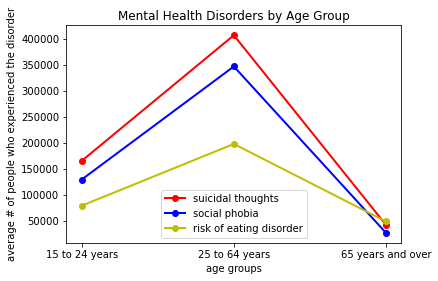

In [87]:
main("canadian_mental_health_profiles_by_age_and_sex.csv")